# Regression Analysis

This notebook demonstrates different regression techniques, including Linear Regression, Exponential Regression, Power Function Regression, and Saturated Growth Regression, with real-world applications and explanations.

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

## 2. Sample Data: Sales Growth

We use hypothetical sales data (in thousands of units) over 10 months.

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.3, 2.9, 3.7, 4.4, 5.1, 5.9, 6.8, 7.4, 8.2, 9.0])

## 3. Linear Regression

### Explanation:
Linear regression models the relationship between two variables by fitting a straight line.

### Real-World Example:
Predicting revenue based on advertising expenditure.

In [3]:
model = LinearRegression()
x_reshaped = x.reshape(-1, 1)
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

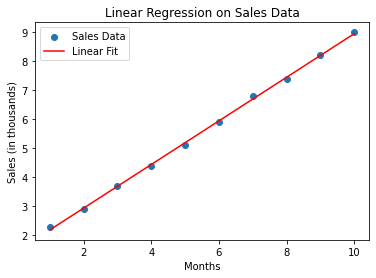

In [4]:
plt.scatter(x, y, label='Sales Data')
plt.plot(x, y_pred, color='red', label='Linear Fit')
plt.xlabel('Months')
plt.ylabel('Sales (in thousands)')
plt.title('Linear Regression on Sales Data')
plt.legend()
plt.show()

## 4. Exponential Regression

### Explanation:
Used when growth follows an exponential pattern, such as population or viral growth.

### Real-World Example:
Modeling the spread of a virus over time.

In [5]:
def exp_model(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exp_model, x, y)
a, b = params

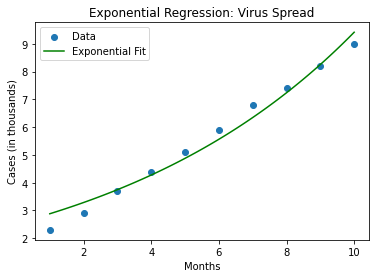

In [6]:
x_fine = np.linspace(min(x), max(x), 100)
y_exp_fit = exp_model(x_fine, a, b)
plt.scatter(x, y, label='Data')
plt.plot(x_fine, y_exp_fit, color='green', label='Exponential Fit')
plt.xlabel('Months')
plt.ylabel('Cases (in thousands)')
plt.title('Exponential Regression: Virus Spread')
plt.legend()
plt.show()

## 5. Power Function Regression

### Explanation:
Models data following a power-law relationship.

### Real-World Example:
The relationship between earthquake magnitude and frequency.

In [7]:
def power_model(x, C, b):
    return C * x ** b

params, _ = curve_fit(power_model, x, y)
C, b = params

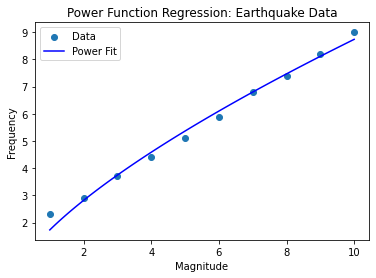

In [8]:
y_power_fit = power_model(x_fine, C, b)
plt.scatter(x, y, label='Data')
plt.plot(x_fine, y_power_fit, color='blue', label='Power Fit')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Power Function Regression: Earthquake Data')
plt.legend()
plt.show()

## 6. Saturated Growth Regression

### Explanation:
Models growth that slows down due to limited resources.

### Real-World Example:
Population growth limited by food and space.

In [9]:
def sat_growth(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

params, _ = curve_fit(sat_growth, x, y, p0=[max(y), 1, np.median(x)])
a, b, c = params

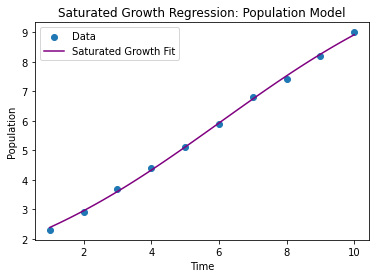

In [10]:
y_sat_fit = sat_growth(x_fine, a, b, c)
plt.scatter(x, y, label='Data')
plt.plot(x_fine, y_sat_fit, color='purple', label='Saturated Growth Fit')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Saturated Growth Regression: Population Model')
plt.legend()
plt.show()

## 7. Model Coefficients

In [11]:
print(f'Linear Regression: Intercept = {model.intercept_}, Slope = {model.coef_[0]}')
print(f'Exponential Model: a = {a}, b = {b}')
print(f'Power Function Model: C = {C}, b = {b}')
print(f'Saturated Growth Model: a = {a}, b = {b}, c = {c}')

Linear Regression: Intercept = 1.4399999999999995, Slope = 0.7509090909090911
Exponential Model: a = 11.931295215829925, b = 0.27452138453336
Power Function Model: C = 1.7295391393015018, b = 0.27452138453336
Saturated Growth Model: a = 11.931295215829925, b = 0.27452138453336, c = 6.054585211714388


## 8. Conclusion

- **Linear Regression**: Best for steady trends, such as revenue prediction.
- **Exponential Regression**: Ideal for rapid growth, such as virus spread.
- **Power Function Regression**: Suited for phenomena following power-law relationships, like earthquakes.
- **Saturated Growth Regression**: Used when growth slows down due to constraints, like population growth.

Each method is useful for different types of data and should be chosen based on the nature of the problem.